# Metrics

In [1]:
from utils import *
%load_ext autoreload
%autoreload 2

In [73]:
cfg = {
'EXPERIMENT': 'filter20_',
'DATASET': 'coco',
'MODEL': 'MobileSAM_fd',
'TARGET': 'SAM',
'SPARSITY': 0,
'CLASS': 0,
'MODE': '',
'METRIC': 'iou'
}
cfg['ROOT'], cfg['N'], cfg['CLASSES'], cfg['SUPERCLASSES'], cfg['SUP_N'] = get_dataset_info(cfg['DATASET'])
cfg['SUP_L'] = {v: k for k, v in cfg['SUP_N'].items()}

## Compute Metrics

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
df_p = pd.read_pickle(f"results/{cfg['EXPERIMENT']}{cfg['DATASET']}_prompts.pkl")
df_0 = pd.read_pickle(f"results/{cfg['EXPERIMENT']}{cfg['DATASET']}_{cfg['TARGET']}_0.pkl")
df_s = pd.read_pickle(f"results/{cfg['EXPERIMENT']}{cfg['DATASET']}_{cfg['MODEL']}_{cfg['SPARSITY']}{cfg['MODE']}.pkl")

In [76]:
df_s.head()

,name,prompt,class,s_class,mask,mask_origin,score
0,139,"[452, 206]",1,[1],"[[False, False, False, False, False, False, Fa...","[0, 0]",0.938431
1,285,"[568, 514]",23,[23],"[[False, False, False, False, False, False, Fa...","[0, 0]",0.982022
2,632,"[519, 266]",84,"[0, 84]","[[False, False, False, False, False, False, Fa...","[0, 0]",0.839699
3,724,"[125, 286]",8,"[0, 8]","[[False, False, False, False, False, False, Fa...","[0, 0]",0.921087
4,776,"[36, 67]",65,[65],"[[True, True, True, True, True, True, True, Tr...","[0, 0]",0.985906


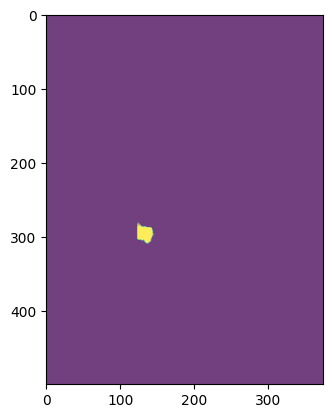

In [77]:
plt.imshow(df_s['mask'][3], alpha=0.5)
plt.imshow(df_0['mask'][3], alpha=0.5)

In [78]:
# Add Image Shape
if 'shape' not in df_p.keys():
    df_p = add_image_shape(df_p, cfg)
    df_p.head()
    df_p.to_pickle(f"results/{cfg['EXPERIMENT']}{cfg['DATASET']}_prompts.pkl")

In [79]:
df_0s = get_analytics(df_0, df_s, df_p, cfg)
df_0s.to_pickle(f"analytics/{cfg['EXPERIMENT']}{cfg['DATASET']}_{cfg['MODEL']}_{cfg['SPARSITY']}{cfg['MODE']}.pkl")
df_0s.head()

,name,prompt,class,t_class,s_class,score,score_diff,mask_size,mask_size_diff,iou,pixel_acc,dice,precision,recall,specificity
0,139,"[452, 206]",1,"[0, 1]",[1],0.938431,-0.040737,0.004211,-0.055199,0.910843,0.999593,0.953342,0.987805,0.921202,0.999948
1,285,"[568, 514]",23,"[0, 23]",[23],0.982022,-0.033056,0.722230,-0.020646,0.979326,0.984754,0.989555,1.000000,0.979326,1.000000
2,632,"[519, 266]",84,"[0, 84]","[0, 84]",0.839699,-0.103663,0.013144,-0.032100,0.744937,0.996089,0.853827,0.869062,0.839116,0.998255
3,724,"[125, 286]",8,"[0, 8]","[0, 8]",0.921087,-0.019865,0.002064,-0.052762,0.909953,0.999797,0.952854,0.992248,0.916468,0.999984
4,776,"[36, 67]",65,"[0, 65]",[65],0.985906,-0.020497,0.031845,-0.007282,0.986388,0.999562,0.993148,0.996905,0.989419,0.999898


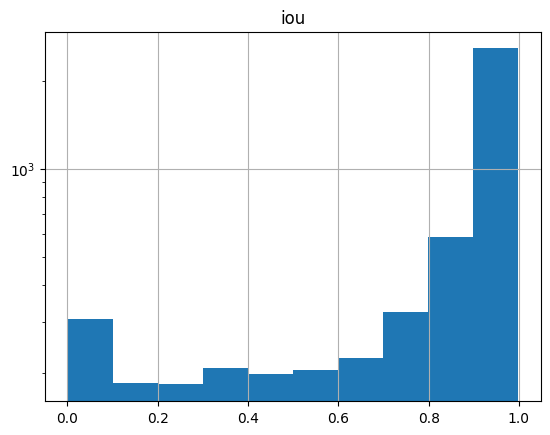

0.7462572585147328

In [62]:
# BASELINE
df_0s.hist(column='iou')
plt.semilogy()
plt.show()
df_0s['iou'].mean()

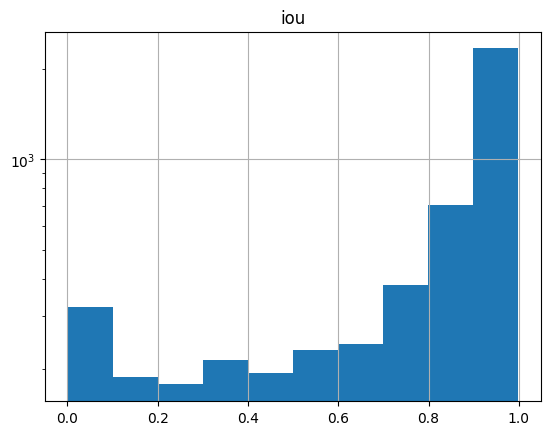

0.7341220822976999

In [80]:
# DICE + FOCAL
df_0s.hist(column='iou')
plt.semilogy()
plt.show()
df_0s['iou'].mean()

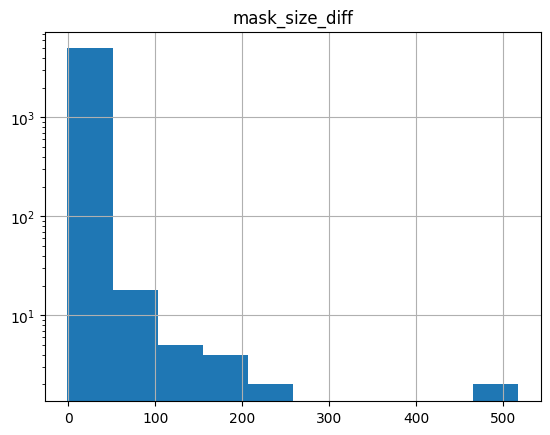

1.5949479939457265

In [63]:
# BASELINE
df_0s.hist(column='mask_size_diff')
plt.semilogy()
plt.show()
df_0s['mask_size_diff'].mean()

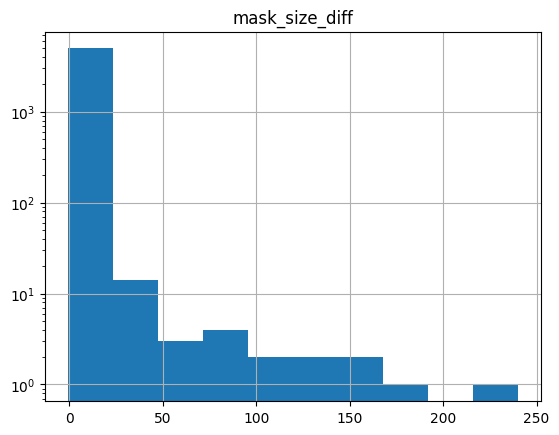

0.6372733248136113

In [81]:
# DICE + FOCAL
df_0s.hist(column='mask_size_diff')
plt.semilogy()
plt.show()
df_0s['mask_size_diff'].mean()

## Batch Save Analytics

In [10]:
save_analytics(cfg)

In [45]:
get_summary(cfg)

,id,pruning,class,n,iou,iou_std,iou_hist,mask_size_diff,mask_size_diff_std,mask_size_diff_hist,score_diff,score_diff_std,score_diff_hist,precision,precision_std,precision_hist,recall,recall_std,recall_hist
0,MobileSAM,,-1,5000,0.741664,0.29982,"([266, 145, 112, 119, 145, 134, 145, 158, 151,...",0.808602,8.896986,"([4963, 18, 5, 2, 5, 1, 2, 1, 0, 1, 1, 0, 0, 1...",-0.027732,0.04406,"([2, 8, 19, 61, 304, 1640, 2844, 95, 17, 6, 1,...",0.869637,0.245431,"([135, 70, 57, 59, 66, 68, 81, 71, 78, 74, 103...",0.848106,0.25668,"([161, 80, 64, 65, 77, 75, 65, 93, 92, 96, 140..."


In [82]:
get_summary(cfg)

,id,pruning,class,n,iou,iou_std,iou_hist,mask_size_diff,mask_size_diff_std,mask_size_diff_hist,score_diff,score_diff_std,score_diff_hist,precision,precision_std,precision_hist,recall,recall_std,recall_hist
0,MobileSAM_fd,,-1,5000,0.734122,0.300325,"([267, 144, 119, 134, 144, 148, 138, 158, 165,...",0.637273,7.277658,"([4957, 21, 7, 2, 3, 3, 1, 1, 2, 1, 1, 0, 0, 1...",-0.034723,0.046504,"([3, 9, 23, 66, 261, 1052, 3347, 202, 23, 10, ...",0.877717,0.237178,"([118, 63, 58, 63, 51, 67, 71, 68, 68, 77, 101...",0.831784,0.266744,"([182, 86, 66, 78, 92, 83, 73, 99, 109, 110, 1..."


In [ ]:
for s in range(10, 100, 10):
    cfg['SPARSITY'] = s
    save_analytics(cfg)

## Global Analytics

In [10]:
# Save Summary
summary = []
for m in MODES:
    cfg['MODE'] = m
    for s in SPARSITIES:
        cfg['SPARSITY'] = s
        summary.append(get_summary(cfg))

cfg['MODE'] = ''
cfg['SPARSITY'] = 0
for n in MODELS[1:]:
    cfg['MODEL'] = n
    summary.append(get_summary(cfg))
summary = pd.concat(summary)
summary.to_pickle(f"analytics/{cfg['EXPERIMENT']}{cfg['DATASET']}_summary.pkl")

FileNotFoundError: [Errno 2] No such file or directory: 'analytics/filter20_coco_MobileSAM_10.pkl'

In [ ]:
# Histograms
for t in METRICS:
    cfg['METRIC'] = t
    for m in MODES:
        cfg['MODE'] = m
        summary = []
        for s in SPARSITIES:
            cfg['SPARSITY'] = s
            summary.append(get_summary(cfg))
        summary = pd.concat(summary)
        get_hists(summary, cfg, save=True, plot=True)
plt.clf()

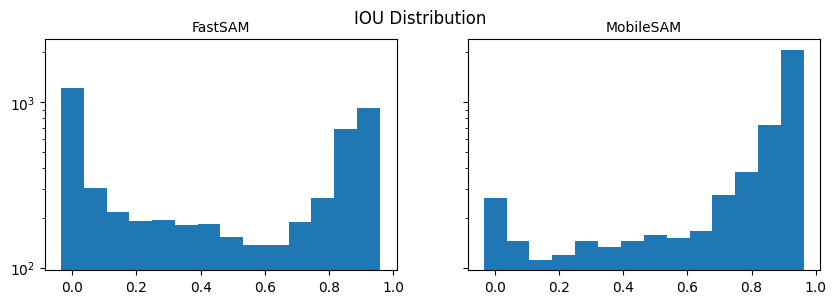

<Figure size 640x480 with 0 Axes>

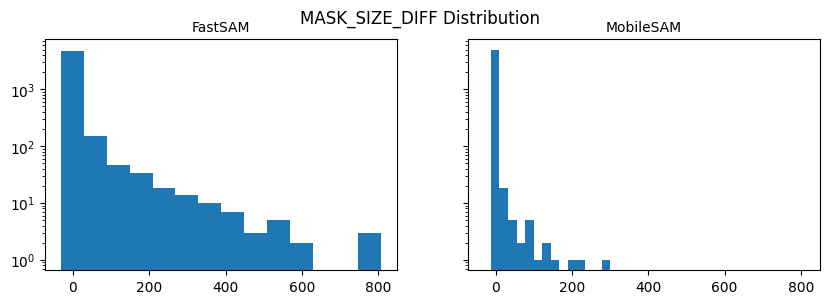

<Figure size 640x480 with 0 Axes>

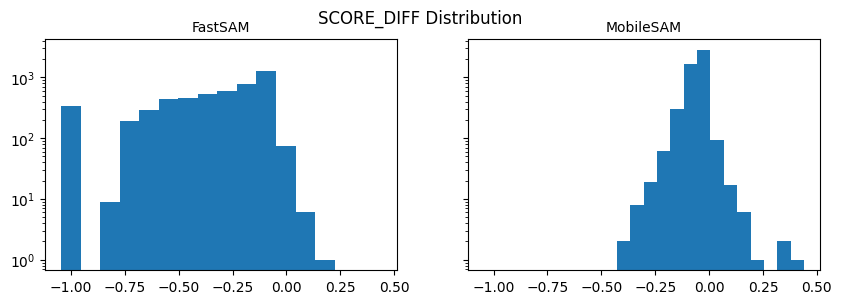

<Figure size 640x480 with 0 Axes>

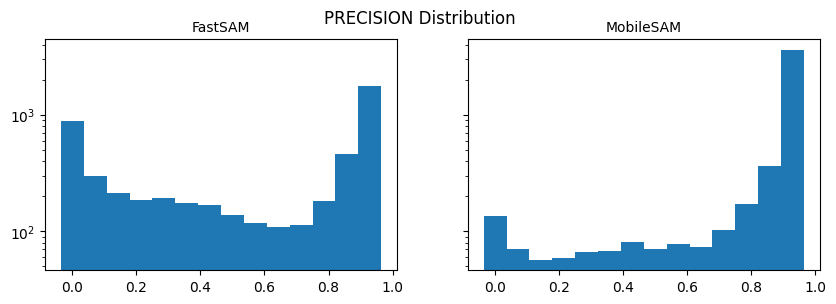

<Figure size 640x480 with 0 Axes>

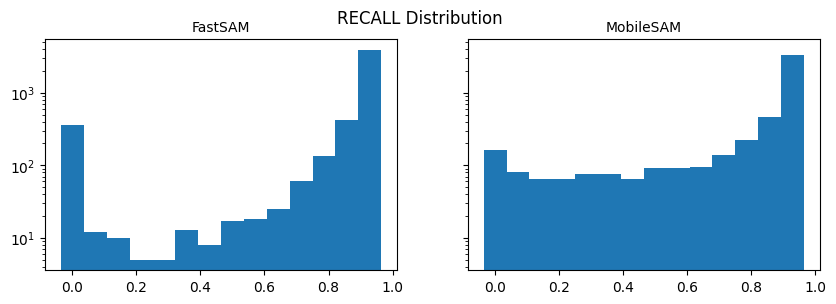

<Figure size 640x480 with 0 Axes>

In [11]:
cfg['MODE'] = ''
cfg['SPARSITY'] = 0
for t in METRICS:
    cfg['METRIC'] = t
    summary = []
    for n in MODELS[1:]:
        cfg['MODEL'] = n
        summary.append(get_summary(cfg))
    summary = pd.concat(summary)
    get_hists(summary, cfg, save=True, plot=True)
    plt.clf()

## Global Curves

In [ ]:
summary = pd.read_pickle(f"analytics/{cfg['EXPERIMENT']}{cfg['DATASET']}_summary.pkl")

for m in METRICS:
    cfg['METRIC'] = m
    get_curves(summary, cfg, std=False, plot=True, save=True)

## Class-wise Analytics

In [ ]:
# Save Summary
summary = []
for m in MODES:
    cfg['MODE'] = m
    for s in SPARSITIES:
        cfg['SPARSITY'] = s
        summary.append(get_summary(cfg, classwise=True))

cfg['MODE'] = ''
cfg['SPARSITY'] = 0
for n in MODELS[1:]:
    cfg['MODEL'] = n
    summary.append(get_summary(cfg, classwise=True))
summary = pd.concat(summary)
summary.to_pickle(f"analytics/{cfg['EXPERIMENT']}{cfg['DATASET']}_classwise.pkl")

In [ ]:
d = summary[summary['pruning']=='_gup']
d = d[d['id']==50]
d = d[d['class']!=0]
get_hists(d, cfg, save=False, plot=True)

## Class-wise Curves

In [ ]:
summary = pd.read_pickle(f"analytics/{cfg['EXPERIMENT']}{cfg['DATASET']}_classwise.pkl")

In [ ]:
def get_classwise_curves(d, cfg, plot=True, save=False):
    _, ax = plt.subplots()
    ax.grid()
    ax.title.set_text(cfg['METRIC'].replace('_', ' ').capitalize())
    ax.plot(PARAMS['SAM'], SAM[cfg['METRIC']], 'o')
     
    for c in range(1, d.shape[1]):
        if cfg['MODEL'] == 'SAM':
            p = (1 - d[:,c,1]/100) * PARAMS['SAM'] 
        else:
            p = PARAMS[d[:,c,1][0]]
        ax.plot(p, d[:,c,2], '-o', label=f"{cfg['SUP_L'][c]} ({d[0,c,3]})")
    # Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=False, shadow=False, ncol=4, fontsize=9)   
    #plt.legend(loc='best', fontsize=9, ncol=2)
    plt.xlabel('Parameters')
    plt.ylabel(cfg['METRIC'].replace('_', ' ').capitalize())
    plt.axvline(PARAMS['SAM'], linestyle='--')
    plt.axhline(SAM[cfg['METRIC']], linestyle='--')
    plt.semilogx()
    if save:
        plt.savefig(f"figures/{cfg['EXPERIMENT']}{cfg['DATASET']}_{cfg['METRIC']}_{cfg['MODEL']}{cfg['MODE']}_curves_classwise.pdf", bbox_inches='tight')
    if plot:
        plt.show()
    plt.clf()

In [ ]:
# GUP
for m in METRICS:
    cfg['METRIC'] = m
    d = summary[summary['pruning']=='_gup'][['class', 'id', cfg['METRIC'], 'n']].values.reshape(9, 13, -1)
    get_classwise_curves(d, cfg, plot=True, save=True)

# SparseGPT
cfg['MODE'] = '_gup'
for m in METRICS:
    cfg['METRIC'] = m
    d = summary[summary['id'].str.isalpha().isnull()]
    d = d[d['pruning']!='_gup'][['class', 'id', cfg['METRIC'], 'n']].values.reshape(9, 13, -1)
    get_classwise_curves(d, cfg, plot=True, save=True)

# FastSAM
# cfg['MODEL'] = 'FastSAM'
# for m in METRICS:
#     cfg['METRIC'] = m
#     d = summary[summary['id']==cfg['MODEL']][['class', 'id', cfg['METRIC'], 'n']].values.reshape(1, 13, -1)
#     get_classwise_curves(d, cfg, plot=True, save=True)

# MobileSAM
# cfg['MODEL'] = 'MobileSAM'
# for m in METRICS:
#     cfg['METRIC'] = m
#     d = summary[summary['id']==cfg['MODEL']][['class', 'id', cfg['METRIC'], 'n']].values.reshape(1, 13, -1)
#     get_classwise_curves(d, cfg, plot=True, save=True)

# Mobile&FastSAM
cfg['MODEL'] = 'Mobile&FastSAM'
for m in METRICS:
    cfg['METRIC'] = m
    d = summary[summary['id'].str.isalpha().notnull()][['class', 'id', cfg['METRIC'], 'n']].values.reshape(1, 13, -1)
    get_classwise_curves(d, cfg, plot=True, save=True)

In [ ]:
def get_forgettability_curve_dissimilarity(d, cfg, plot=True, save=False):
    fcd = np.zeros((d.shape[1], d.shape[1]))
    for c1 in range(d.shape[1]):
        for c2 in range(c1, d.shape[1]):
            if c1 == c2:
                continue
            fcd[c1, c2] = ((d[:,c1,2] - d[:,c2,2])**2).mean()
            fcd[c2, c1] = fcd[c1, c2]

    plt.imshow(fcd, interpolation='nearest')
    plt.xticks(range(12), [cfg['SUP_L'][i] for i in range(1, 13)], rotation=90)
    plt.yticks(range(12), [cfg['SUP_L'][i] for i in range(1, 13)])
    plt.title('Forgettability Curve Dissimilarity - GUP')
    plt.colorbar()
    if save:
        plt.savefig(f"figures/{cfg['EXPERIMENT']}{cfg['DATASET']}{cfg['MODE']}_fcd.pdf", bbox_inches='tight')
    if plot:
        plt.show()
    else:
        plt.clf()


In [ ]:
if cfg['MODE'] == '':
    # SparseGPT
    d = summary[summary['id'].str.isalpha().isnull()]
    d = d[d['pruning']!='_gup'][['class', 'id', cfg['METRIC'], 'n']].values.reshape(9, 13, -1)[:,1:,:]
elif cfg['MODE'] == '_gup':
    # GUP
    d = summary[summary['pruning']=='_gup'][['class', 'id', cfg['METRIC']]].values.reshape(9, 13, -1)[:,1:,:]

In [ ]:
get_forgettability_curve_dissimilarity(d, cfg, plot=True, save=True)

## Cluster Analytics

In [ ]:
df = pd.read_pickle(f"analytics/{cfg['EXPERIMENT']}{cfg['DATASET']}_{cfg['MODEL']}_{cfg['SPARSITY']}{cfg['MODE']}.pkl")
df.head()

In [ ]:
df.hist(column='iou')
plt.semilogy()
plt.show()

In [ ]:
df = add_superclass(df, cfg)
df['mask_size_target'] = (df['mask_size'] - df['mask_size_diff'] * 1e-5) / (1 + df['mask_size_diff'])
df['f1'] = 2 * df['precision'] * df['recall'] / (df['precision'] + df['recall'])

In [ ]:
features = ['iou', 'precision', 'recall', 'mask_size', 'mask_size_diff', 'superclass']
data = df[features].values

In [ ]:
df['cluster'] = get_clusters(data, cfg, plot=True, save=False)
#df.to_pickle(f"analytics/{cfg['EXPERIMENT']}{cfg['DATASET']}_{cfg['MODEL']}_{cfg['SPARSITY']}{cfg['MODE']}.pkl")

In [ ]:
from itertools import product
def prod(l1, l2):
   return list(product(l1, l2))

M = ['iou', 'precision', 'recall']

fig, axs = plt.subplots(3, 3, sharex=True, sharey='row', figsize=(10,8))
for (ax, (c,m)) in zip(axs.flat, prod(range(3), M)):
    y, x = np.histogram(df[df['cluster']==c][m])
    ax.bar(x[:-1], y, width=x[1]-x[0], alpha=1)
    ax.set_title(f"[{c}] {m}", fontsize=10)
    ax.semilogy()
plt.suptitle(f"{cfg['MODEL']} {cfg['MODE']}", fontsize=12)
plt.savefig(f"figures/{cfg['EXPERIMENT']}{cfg['DATASET']}_{cfg['MODEL']}_{cfg['SPARSITY']}{cfg['MODE']}_clusters.pdf", bbox_inches='tight')
plt.show()

## CIEs

 **ID**       |**0**|**1**|**2**|
--------------|-----|-----|-----|
*SAM_40gup_20*|R    |IoU  |P    |
*SAM_80_20*   |P    |R    |IoU  |
*MobileSAM_20*|IoU  |R    |P    |
*FastSAM_20*  |R    |IoU  |P    |

In [ ]:
df = pd.read_pickle(f"analytics/{cfg['EXPERIMENT']}{cfg['DATASET']}_{cfg['MODEL']}_{cfg['SPARSITY']}{cfg['MODE']}.pkl")
df_0 = pd.read_pickle(f"results/{cfg['EXPERIMENT']}{cfg['DATASET']}_{cfg['TARGET']}_0.pkl")
df_s = pd.read_pickle(f"results/{cfg['EXPERIMENT']}{cfg['DATASET']}_{cfg['MODEL']}_{cfg['SPARSITY']}{cfg['MODE']}.pkl")

In [ ]:
C = 2
N = int(0.05*len(df))
df_c = df[df['cluster']==C]
min_iou = df_c.nsmallest(N, ['iou'])

In [ ]:
df_c['iou'].mean(), min_iou['iou'].mean()

In [ ]:
show_samples(pie_df=min_iou, target_df=df_0, pred_df=df_s, cfg=cfg, prompt_zoom=False, n=5, random=True, save=False)

## Small Masks

In [ ]:
df = pd.read_pickle(f"analytics/{cfg['EXPERIMENT']}{cfg['DATASET']}_{cfg['MODEL']}_{cfg['SPARSITY']}{cfg['MODE']}.pkl")
df_0 = pd.read_pickle(f"results/{cfg['EXPERIMENT']}{cfg['DATASET']}_{cfg['TARGET']}_0.pkl")
df_s = pd.read_pickle(f"results/{cfg['EXPERIMENT']}{cfg['DATASET']}_{cfg['MODEL']}_{cfg['SPARSITY']}{cfg['MODE']}.pkl")

In [ ]:
# Filter out SAM's wrong masks (out of prompt)
df_0['check'] = df_0.apply(lambda s: check_prompt(s), axis=1)
df_0.hist(column='check', range=(0,.1))

df_0 = df_0[df_0['check']!=0]
df = df[(df.name.isin(df_0.name))]
df_s = df_s[(df_s.name.isin(df_0.name))]

In [ ]:
df_s['check'] = df_s.apply(lambda s: check_prompt(s), axis=1)
df_s.hist(column='check', range=(0,.1))

df_s = df_s[df_s['check']!=0]
df = df[(df.name.isin(df_s.name))]
df_0 = df_0[(df_0.name.isin(df_s.name))]

In [ ]:
df['mask_size_target'] = (df['mask_size'] - df['mask_size_diff'] * 1e-5) / (1 + df['mask_size_diff'])
df['f1'] = 2 * df['precision'] * df['recall'] / (df['precision'] + df['recall'])

In [ ]:
N = int(0.1*len(df))
min_iou = df.nsmallest(N, ['iou']) # [df['iou']>0.001]

In [ ]:
weights = np.ones_like(df['mask_size_target']) / len(df['mask_size_target'])
df.hist(column='mask_size_target', range=(0,1), weights=weights, cumulative=True, bins=100)
plt.show()

In [ ]:
weights = np.ones_like(min_iou['mask_size_target']) / len(min_iou['mask_size_target'])
min_iou.hist(column='mask_size_target', range=(0,1), weights=weights, cumulative=True, bins=100)
plt.show()

In [ ]:
print(len(df))
print(len(df[df['mask_size_diff'] < -0.5]) / len(df) * 100)
print(len(df[df['mask_size_diff'] > 0.5]) / len(df) * 100)

In [ ]:
print(len(min_iou))
print(len(min_iou[min_iou['mask_size_diff'] < -0.5]) / len(min_iou) * 100)
print(len(min_iou[min_iou['mask_size_diff'] > 0.5]) / len(min_iou) * 100)

In [ ]:
min_iou.hist(column='mask_size', bins=100)
plt.semilogy()
plt.ylim(1, 350)
plt.show()

In [ ]:
min_iou.sort_values(by=['f1'], ascending=True, inplace=True)

In [ ]:
show_samples(pie_df=min_iou, target_df=df_0, pred_df=df_s, cfg=cfg, prompt_zoom=False, thr=50, n=10, random=True, save=False, zoom=True)

# Test

In [ ]:
from main import *
from utils import *

In [ ]:
data_dir = Path('../Datasets/')

In [ ]:
def get_prompt(label):
    show_points_on_image(label.bool(), [[0,0]], input_labels=None)
    e = cv2.Canny(image=label.numpy().astype(np.uint8), threshold1=10, threshold2=50)
    e = cv2.dilate(e, np.ones((10, 10), np.uint8), iterations = 1).astype(bool)
    label[e] = 0
    C = np.unique(label)[1:]
    if len(C) == 0:
        c = 0
    else:
        c = np.random.choice(C)
    x_v, y_v = np.where(label == c)
    r = random.randint(0, len(x_v) - 1)
    x, y = x_v[r], y_v[r]
    show_points_on_image(label.bool(), [[y,x]], input_labels=None)

    return [[[y,x]]], c # inverted to compensate different indexing

In [ ]:
dataset = COCOSegmentation(root=data_dir.joinpath('coco-2017/'), split='val', crop_size=0)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=False, 
                                         num_workers=4, pin_memory=True, worker_init_fn=None)


In [ ]:
for j, (i, l, n) in enumerate(dataloader):
    prompt, p_class = get_prompt(l[0])
    print(prompt)
    #if l[0][prompt[0][0][1], prompt[0][0][0]] == 0 and l[0].any():
    print(n)
    plt.imshow(i[0])
    plt.imshow(l[0].bool(), alpha=.5)
    show_points_and_masks_on_image(i[0], l.bool(), prompt[0], input_labels=None, zoom=True, prompt_zoom=True, thr=20, save=None)
    break

In [ ]:
raw_image = Image.open(data_dir.joinpath('coco-2017/val2017/000000000139.jpg')).convert("RGB")

In [ ]:
device = torch.device(f"cuda:0" if torch.cuda.is_available() else "cpu")
model = SamModel.from_pretrained("facebook/sam-vit-huge").to(device)
processor = SamProcessor.from_pretrained("facebook/sam-vit-huge")

In [ ]:
input_points = [[[514, 216]]]
show_points_on_image(raw_image, input_points[0])

inputs = processor(raw_image, input_points=input_points, return_tensors="pt").to(device)
image_embeddings = model.get_image_embeddings(inputs["pixel_values"])


inputs.pop("pixel_values", None) # pixel_values are no more needed
inputs.update({"image_embeddings": image_embeddings})

with torch.no_grad():
    outputs = model(**inputs)

In [ ]:
masks = processor.image_processor.post_process_masks(outputs.pred_masks.cpu(), inputs["original_sizes"].cpu(), inputs["reshaped_input_sizes"].cpu())[0]
scores = outputs.iou_scores
show_masks_on_image(raw_image, masks, scores)

In [ ]:
masks.shape

In [ ]:
mask_sam = masks[0,scores.argmax()]

In [ ]:
plt.imshow(raw_image)
plt.imshow(mask_sam, alpha=.5)

In [ ]:
model_type = "vit_t"
sam_checkpoint = "bin/mobile_sam.pt"

model = sam_model_registry[model_type](checkpoint=sam_checkpoint).to(device).eval()
predictor = SamPredictor(model)

In [ ]:
input_label = np.array([1])



with torch.no_grad():
    predictor.set_image(np.array(raw_image))
    masks, scores, _ = predictor.predict(np.array(input_points[0]), input_label)

plt.imshow(raw_image)
plt.imshow(mask_sam, alpha=0.5)
plt.imshow(masks[np.argmax(scores)], alpha=0.5)
plt.scatter(input_points[0][0][0], input_points[0][0][1], c='r', s=10)

plt.axis('off')
plt.show()

In [ ]:
scores

In [ ]:
df_0 = pd.read_pickle(f"results/{cfg['EXPERIMENT']}{cfg['DATASET']}_{cfg['TARGET']}_0.pkl")
df_0.head()

In [ ]:
df_0['check'] = df_0.apply(lambda s: check_prompt(s), axis=1)
df_invalid = df_0[df_0['check']==0].head()

In [ ]:
df_0.hist(column='check', range=(0,1))

In [ ]:
df_invalid = df_0[df_0['check']==0].head()

In [ ]:
show_samples(pie_df=df_invalid, target_df=df_0, pred_df=df_s, cfg=cfg, prompt_zoom=True, n=5, random=True, save=False)